In [150]:
%pip install prophet
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet

In [152]:
data_x = pd.read_csv("files/congress-trading-all.csv")
x_df = pd.DataFrame(data_x)
display(x_df.head())


,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25


In [195]:
x_df_clean = x_df[['Name','Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean['excess_return'] = x_df_clean['excess_return'].fillna(0).round(2)
x_df_clean['excess_return'] = x_df_clean['excess_return'].round(2)
x_df_clean['Traded'] = pd.to_datetime(x_df_clean['Traded'])
display(x_df_clean.head())
display(x_df_clean.tail())

/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/857196422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['excess_return'] = x_df_clean['excess_return'].fillna(0).round(2)
/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/857196422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['excess_return'] = x_df_clean['excess_return'].round(2)
/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/857196422.py:4: SettingWithCopyWarning: 
A value 

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene,R,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.05
1,Earl Leroy Carter,R,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.77
2,Marjorie Taylor Mrs Greene,R,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.59
3,Marjorie Taylor Mrs Greene,R,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.54
4,Marjorie Taylor Mrs Greene,R,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.60


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
47266,Ms. Tammy Duckworth,D,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",19.00
47267,Ms. Tammy Duckworth,D,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",-143.88
47268,Mr. Alan S. Lowenthal,D,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",89.24
47269,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",0.00
47270,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-02-27,Sale,"$1,001 - $15,000",0.00


In [154]:
for column in x_df_clean.columns:
    print(x_df_clean['Name'].value_counts())

Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick 

In [155]:
x_df_clean['Name'].unique()

array(['Marjorie Taylor Mrs Greene', 'Earl Leroy Carter',
       'Robert E. Latta', 'Kathy Castor', 'Rudy Yakym Iii',
       'Boozman, John', 'Rick Larsen', 'Jamie Raskin',
       'Gerald E. Connolly', 'Nancy Pelosi', 'Mark Dr Green',
       'Josh Gottheimer', 'Victoria Spartz', 'Kevin Hern',
       'Morgan Mcgarvey', 'Earl Blumenauer', 'Whitehouse, Sheldon',
       'Capito, Shelley Moore', 'Max Miller', 'Mullin, Markwayne',
       'Lloyd Doggett', 'Debbie Dingell', 'Richard W. Allen',
       'Kathy Manning', 'Thomas H. Kean Jr.', 'Pete Sessions',
       'Abigail Spanberger', 'McConnell, A. Mitchell Jr.',
       'Hickenlooper, John', 'Carper, Thomas R.', 'Stephen F. Lynch',
       'Virginia Foxx', 'Chip Roy', 'William R. Keating',
       'Debbie Wasserman Schultz', 'Peters, Gary', 'Mikie Sherrill',
       'Tuberville, Tommy', 'Susie Lee', 'Carol Devine Miller',
       'C. Scott Franklin', 'Maria Elvira Salazar', 'Jonathan Jackson',
       'Deborah Ross', 'Cruz, Ted', 'Mike Kelly', 'Dan

In [156]:
x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'
x_df_clean2 = x_df_clean[['Name_Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean2.head()

/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/1642867295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'


,Name_Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene (R),CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.05
1,Earl Leroy Carter (R),AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.77
2,Marjorie Taylor Mrs Greene (R),"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.59
3,Marjorie Taylor Mrs Greene (R),DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.54
4,Marjorie Taylor Mrs Greene (R),JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.60


In [157]:
for column in x_df_clean2.columns:
    print(x_df_clean2['Name_Party'].value_counts())

Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          133

In [158]:
top_subjects = x_df_clean2['Name_Party'].value_counts().head(6)
top_subjects

Name_Party
Josh Gottheimer (D)     2786
Thomas Macarthur (R)    2758
Perdue, David (R)       2242
Lois Frankel (D)        1358
Greg Gianforte (R)      1331
Susie Lee (D)           1262
Name: count, dtype: int64

In [159]:
df_josh = x_df_clean[x_df_clean['Name_Party'] == 'Josh Gottheimer (D)']
df_thomas = x_df_clean[x_df_clean['Name_Party'] == 'Thomas Macarthur (R)']
df_perdue = x_df_clean[x_df_clean['Name_Party'] == 'Perdue, David (R)']
df_lois = x_df_clean[x_df_clean['Name_Party'] == 'Lois Frankel (D)']
df_greg = x_df_clean[x_df_clean['Name_Party'] == 'Greg Gianforte (R)']
df_susie = x_df_clean[x_df_clean['Name_Party'] == 'Susie Lee (D)']

In [160]:
display(df_perdue.head())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
17787,"Perdue, David",R,The Southern Company JR SUB NT 2015A,2020-04-16,Sale (Full),"$15,001 - $50,000",-25.49,"Perdue, David (R)"
17788,"Perdue, David",R,Philip Morris International Inc.,2020-04-16,Sale (Full),"$1,001 - $15,000",-44.67,"Perdue, David (R)"
17791,"Perdue, David",R,The Walt Disney Company,2020-04-16,Sale (Full),"$1,001 - $15,000",-106.89,"Perdue, David (R)"
17792,"Perdue, David",R,"General Mills, Inc.",2020-04-16,Sale (Full),"$1,001 - $15,000",-85.76,"Perdue, David (R)"
17793,"Perdue, David",R,ConocoPhillips,2020-04-16,Sale (Full),"$1,001 - $15,000",161.77,"Perdue, David (R)"


<Figure size 1200x1000 with 0 Axes>

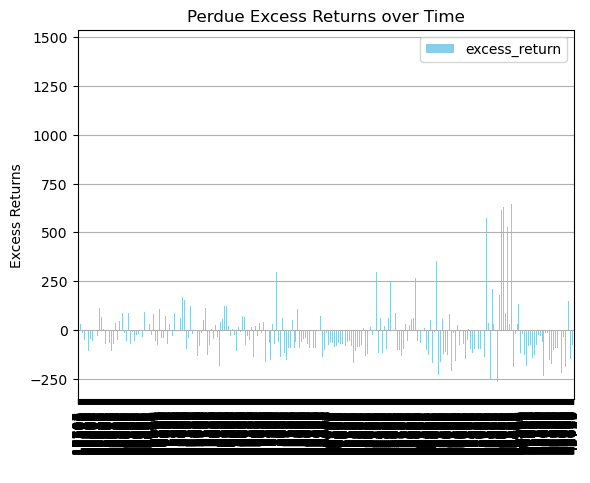

In [161]:
plt.figure(figsize=(12, 10))
df_perdue.plot(kind='bar', color='skyblue')
plt.title('Perdue Excess Returns over Time')
plt.xlabel(' ')
plt.ylabel('Excess Returns')
plt.grid(axis='y')
plt.show()

In [162]:
df_perdue.dtypes


Name               object
Party              object
Company            object
Traded             object
Transaction        object
Trade_Size_USD     object
excess_return     float64
Name_Party         object
dtype: object

In [163]:
df_perdue['Traded'] = pd.to_datetime(df_perdue['Traded'])
df_josh['Traded'] = pd.to_datetime(df_josh['Traded'])
df_greg['Traded'] = pd.to_datetime(df_greg['Traded'])
df_lois['Traded'] = pd.to_datetime(df_lois['Traded'])
df_susie['Traded'] = pd.to_datetime(df_susie['Traded'])
df_thomas['Traded'] = pd.to_datetime(df_thomas['Traded'])

/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/404435960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perdue['Traded'] = pd.to_datetime(df_perdue['Traded'])
/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/404435960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_josh['Traded'] = pd.to_datetime(df_josh['Traded'])
/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_27380/404435960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [164]:
perdue_fil = df_perdue[(df_perdue['Traded'] >= '2019-01-01') & (df_perdue['Traded'] <= '2021-12-31')]
josh_fil= df_josh[(df_josh['Traded'] >= '2019-01-01') & (df_josh['Traded'] <= '2021-12-31')]
greg_fil= df_greg[(df_greg['Traded'] >= '2019-01-01') & (df_greg['Traded'] <= '2021-12-31')]
lois_fil= df_lois[(df_lois['Traded'] >= '2019-01-01') & (df_lois['Traded'] <= '2021-12-31')]
susie_fil= df_susie[(df_susie['Traded'] >= '2019-01-01') & (df_susie['Traded'] <= '2021-12-31')]
thomas_fil= df_thomas[(df_thomas['Traded'] >= '2019-01-01') & (df_thomas['Traded'] <= '2021-12-31')]
perdue_fil


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
17787,"Perdue, David",R,The Southern Company JR SUB NT 2015A,2020-04-16,Sale (Full),"$15,001 - $50,000",-25.49,"Perdue, David (R)"
17788,"Perdue, David",R,Philip Morris International Inc.,2020-04-16,Sale (Full),"$1,001 - $15,000",-44.67,"Perdue, David (R)"
17791,"Perdue, David",R,The Walt Disney Company,2020-04-16,Sale (Full),"$1,001 - $15,000",-106.89,"Perdue, David (R)"
17792,"Perdue, David",R,"General Mills, Inc.",2020-04-16,Sale (Full),"$1,001 - $15,000",-85.76,"Perdue, David (R)"
17793,"Perdue, David",R,ConocoPhillips,2020-04-16,Sale (Full),"$1,001 - $15,000",161.77,"Perdue, David (R)"
...,...,...,...,...,...,...,...,...
26931,"Perdue, David",R,Devon Energy Corporation,2019-01-04,Purchase,"$15,001 - $50,000",-27.14,"Perdue, David (R)"
26954,"Perdue, David",R,Knowles Corporation,2019-01-03,Sale (Partial),"$1,001 - $15,000",-72.94,"Perdue, David (R)"
26957,"Perdue, David",R,"BWX Technologies, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",37.35,"Perdue, David (R)"
26958,"Perdue, David",R,"WPX Energy, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",-71.22,"Perdue, David (R)"


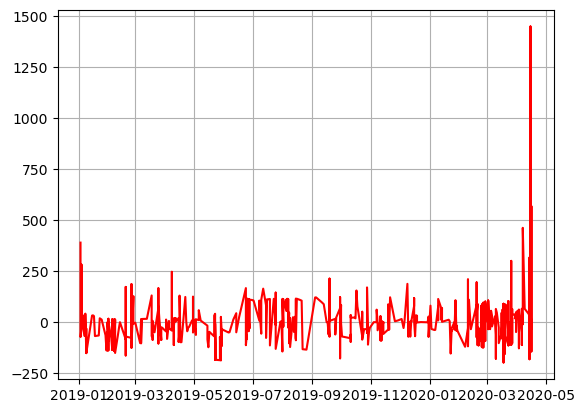

<Figure size 1200x2000 with 0 Axes>

In [165]:
plt.plot(perdue_fil['Traded'], perdue_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

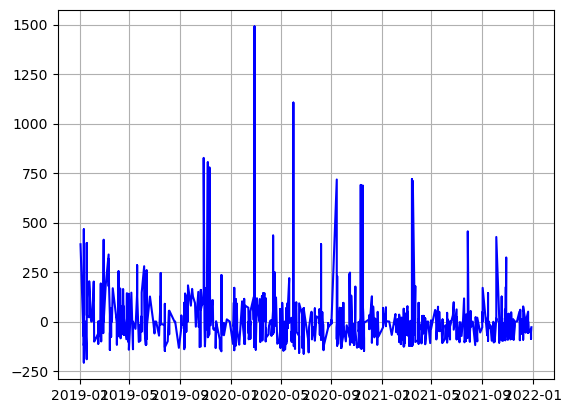

<Figure size 1200x2000 with 0 Axes>

In [166]:
plt.plot(josh_fil['Traded'], josh_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

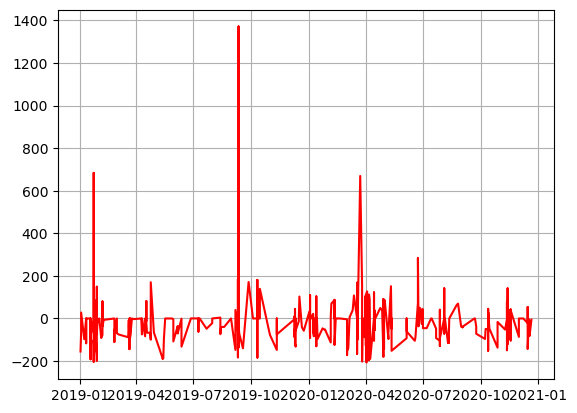

<Figure size 1200x2000 with 0 Axes>

In [167]:
plt.plot(greg_fil['Traded'], greg_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

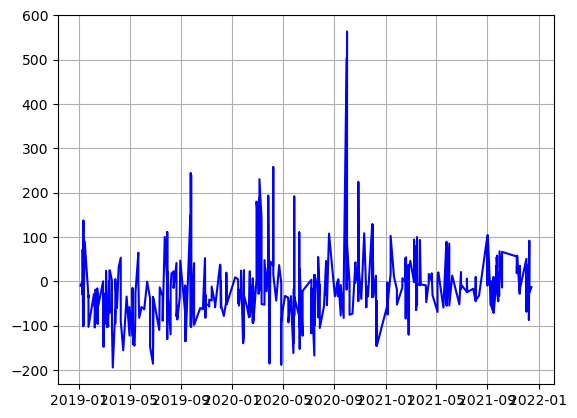

<Figure size 1200x2000 with 0 Axes>

In [168]:
plt.plot(lois_fil['Traded'], lois_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

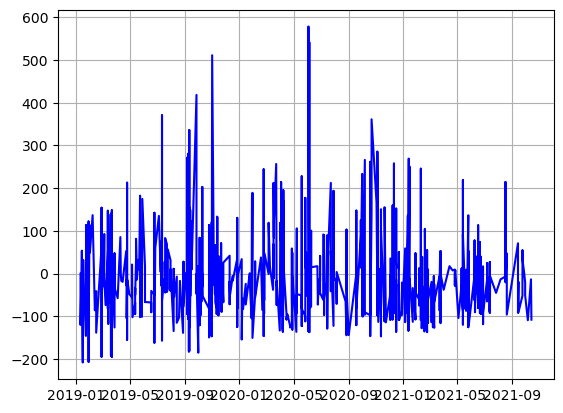

<Figure size 1200x2000 with 0 Axes>

In [169]:
plt.plot(susie_fil['Traded'], susie_fil['excess_return'], color= 'b')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

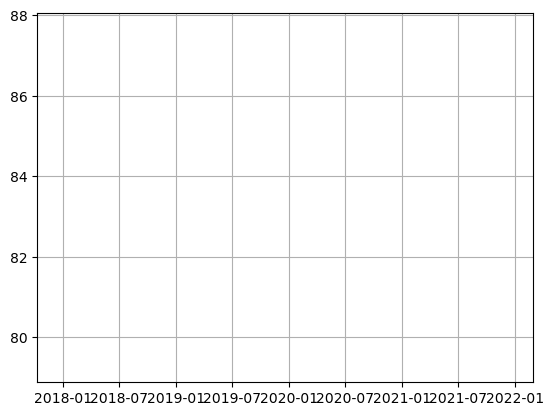

<Figure size 1200x2000 with 0 Axes>

In [170]:
plt.plot(thomas_fil['Traded'], thomas_fil['excess_return'], color= 'r')
plt.grid(True)
plt.figure(figsize=(12,20))
plt.show()

In [171]:
display(perdue_fil)
display(greg_fil)
display(thomas_fil)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
17787,"Perdue, David",R,The Southern Company JR SUB NT 2015A,2020-04-16,Sale (Full),"$15,001 - $50,000",-25.49,"Perdue, David (R)"
17788,"Perdue, David",R,Philip Morris International Inc.,2020-04-16,Sale (Full),"$1,001 - $15,000",-44.67,"Perdue, David (R)"
17791,"Perdue, David",R,The Walt Disney Company,2020-04-16,Sale (Full),"$1,001 - $15,000",-106.89,"Perdue, David (R)"
17792,"Perdue, David",R,"General Mills, Inc.",2020-04-16,Sale (Full),"$1,001 - $15,000",-85.76,"Perdue, David (R)"
17793,"Perdue, David",R,ConocoPhillips,2020-04-16,Sale (Full),"$1,001 - $15,000",161.77,"Perdue, David (R)"
...,...,...,...,...,...,...,...,...
26931,"Perdue, David",R,Devon Energy Corporation,2019-01-04,Purchase,"$15,001 - $50,000",-27.14,"Perdue, David (R)"
26954,"Perdue, David",R,Knowles Corporation,2019-01-03,Sale (Partial),"$1,001 - $15,000",-72.94,"Perdue, David (R)"
26957,"Perdue, David",R,"BWX Technologies, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",37.35,"Perdue, David (R)"
26958,"Perdue, David",R,"WPX Energy, Inc.",2019-01-03,Purchase,"$1,001 - $15,000",-71.22,"Perdue, David (R)"


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
13776,Greg Gianforte,R,CHINA MOBILE LIMITED,2020-12-21,Sale,"$100,001 - $250,000",-5.53,Greg Gianforte (R)
13784,Greg Gianforte,R,"VIASAT, INC.",2020-12-18,Purchase,"$100,001 - $250,000",-82.09,Greg Gianforte (R)
13790,Greg Gianforte,R,ISHARES RUSSELL 2000 VALUE ETF,2020-12-18,Sale,"$250,001 - $500,000",-15.49,Greg Gianforte (R)
13815,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.60,Greg Gianforte (R)
13819,Greg Gianforte,R,CARDTRONICS PLC,2020-12-17,Sale,"$1,001 - $15,000",-3.60,Greg Gianforte (R)
...,...,...,...,...,...,...,...,...
26887,Greg Gianforte,R,ATLAS COPCO AB SPONSORED ADR REPSTG CLASS A,2019-01-04,Purchase,"$100,001 - $250,000",0.00,Greg Gianforte (R)
26902,Greg Gianforte,R,INFINEON TECHNOLOGIES AG,2019-01-04,Purchase,"$250,001 - $500,000",0.00,Greg Gianforte (R)
26956,Greg Gianforte,R,MULTI-COLOR CORPORATION,2019-01-03,Purchase,"$100,001 - $250,000",27.97,Greg Gianforte (R)
26960,Greg Gianforte,R,"THERMON GROUP HOLDINGS, INC.",2019-01-03,Purchase,"$50,001 - $100,000",-60.96,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.47,Thomas Macarthur (R)


In [172]:
display(josh_fil)
display(lois_fil)
display(susie_fil)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
8931,Josh Gottheimer,D,"META PLATFORMS, INC. - CLASS A",2021-12-29,Sale,"$1,001 - $15,000",-28.76,Josh Gottheimer (D)
8952,Josh Gottheimer,D,PING AN INSURANCE,2021-12-28,Sale,"$1,001 - $15,000",-53.92,Josh Gottheimer (D)
8954,Josh Gottheimer,D,"AFFIRM HOLDINGS, INC. - CLASS A",2021-12-28,Sale,"$1,001 - $15,000",-87.48,Josh Gottheimer (D)
8955,Josh Gottheimer,D,TENCENT HOLDINGS LIMITED UNSPONSORED ADR REPRE...,2021-12-28,Sale,"$1,001 - $15,000",-35.96,Josh Gottheimer (D)
9001,Josh Gottheimer,D,XP INC. - CLASS A,2021-12-22,Purchase,"$1,001 - $15,000",-56.30,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
26757,Josh Gottheimer,D,"ALTRIA GROUP, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-107.19,Josh Gottheimer (D)
26762,Josh Gottheimer,D,"UNITED PARCEL SERVICE, INC.",2019-01-11,Purchase,"$1,001 - $15,000",-78.74,Josh Gottheimer (D)
26770,Josh Gottheimer,D,MICROSOFT CORPORATION,2019-01-10,Sale,"$1,001 - $15,000",200.27,Josh Gottheimer (D)
26773,Josh Gottheimer,D,NEWMARKET CORP,2019-01-10,Sale,"$1,001 - $15,000",-71.84,Josh Gottheimer (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
9105,Lois Frankel,D,KIMBERLY-CLARK CORPORATION,2021-12-15,Sale,"$1,001 - $15,000",-13.08,Lois Frankel (D)
9134,Lois Frankel,D,"ZIMMER BIOMET HOLDINGS, INC.",2021-12-10,Purchase,"$1,001 - $15,000",-26.19,Lois Frankel (D)
9136,Lois Frankel,D,"INSPERITY, INC.",2021-12-10,Purchase,"$1,001 - $15,000",-24.84,Lois Frankel (D)
9140,Lois Frankel,D,"BWX TECHNOLOGIES, INC.",2021-12-10,Purchase,"$1,001 - $15,000",91.69,Lois Frankel (D)
9145,Lois Frankel,D,"EPAM SYSTEMS, INC.",2021-12-09,Sale,"$1,001 - $15,000",-86.54,Lois Frankel (D)
...,...,...,...,...,...,...,...,...
26774,Lois Frankel,D,HUNTSMAN CORPORATION,2019-01-10,Purchase,"$1,001 - $15,000",-101.49,Lois Frankel (D)
26783,Lois Frankel,D,"GOLDMAN SACHS GROUP, INC.",2019-01-09,Sale,"$1,001 - $15,000",71.68,Lois Frankel (D)
26799,Lois Frankel,D,"EXPEDITORS INTERNATIONAL OF WASHINGTON, INC.",2019-01-09,Purchase,"$1,001 - $15,000",-30.26,Lois Frankel (D)
26804,Lois Frankel,D,ROCHE HOLDINGS AG BASEL AMERICAN DEPOSITARY SH...,2019-01-09,Purchase,"$1,001 - $15,000",0.00,Lois Frankel (D)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
9649,Susie Lee,D,"RACKSPACE TECHNOLOGY, INC.",2021-10-14,Sale,"$1,001 - $15,000",-107.67,Susie Lee (D)
9664,Susie Lee,D,HOWARD HUGHES CORPORATION,2021-10-13,Sale,"$1,001 - $15,000",-13.26,Susie Lee (D)
9688,Susie Lee,D,"COMMSCOPE HOLDING COMPANY, INC.",2021-10-06,Sale,"$1,001 - $15,000",-108.93,Susie Lee (D)
9774,Susie Lee,D,"ZIMMER BIOMET HOLDINGS, INC.",2021-09-30,Sale,"$15,001 - $50,000",-50.82,Susie Lee (D)
9778,Susie Lee,D,SYNCHRONY FINANCIAL,2021-09-30,Sale,"$1,001 - $15,000",-22.97,Susie Lee (D)
...,...,...,...,...,...,...,...,...
26713,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.84,Susie Lee (D)
26739,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.94,Susie Lee (D)
26742,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",0.00,Susie Lee (D)
26744,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",0.00,Susie Lee (D)


In [173]:
df_thomas

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.47,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.91,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.38,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.91,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.91,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
43714,Thomas Macarthur,R,MICROSOFT CORPORATION,2015-01-09,Purchase,"$1,001 - $15,000",633.96,Thomas Macarthur (R)
43734,Thomas Macarthur,R,SYNGENTA AG,2015-01-06,Purchase,"$1,001 - $15,000",-270.07,Thomas Macarthur (R)
43736,Thomas Macarthur,R,TEVA PHARMACEUTICAL INDUSTRIES LIMITED AMERICA...,2015-01-06,Purchase,"$1,001 - $15,000",-241.87,Thomas Macarthur (R)
43739,Thomas Macarthur,R,KLX INC.,2015-01-06,Sale,"$1,001 - $15,000",10.04,Thomas Macarthur (R)


In [174]:
display(perdue_fil['Company'].value_counts().head(1))
display(greg_fil['Company'].value_counts().head(1))
display(thomas_fil['Company'].value_counts().head(1))

Company
Caesars Entertainment Corporation    33
Name: count, dtype: int64

Company
AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC    15
Name: count, dtype: int64

Company
INTERACTIVE BROKERS GROUP, INC.    1
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Republicans**

*Perdue- Caesar's Entertainment Corporation- 33 Total*

*Greg- AMN Healthcare Services Inc.- 15 Total*

*Thomas- Interactive Brokers Group, Inc.- 1 Total*


In [175]:
display(josh_fil['Company'].value_counts().head(1))
display(lois_fil['Company'].value_counts().head(1))
display(susie_fil['Company'].value_counts().head(1))

Company
MICROSOFT CORPORATION    156
Name: count, dtype: int64

Company
DUPONT DE NEMOURS, INC.    10
Name: count, dtype: int64

Company
BALL CORPORATION    21
Name: count, dtype: int64

**Most Common Company of Stocks Purchased from 2019-2021-- Democrats**

*Josh- Microsoft Corporation- 156 Total*

*Lois- Dupont De Nemours, Inc. - 10 Total*

*Susie- Ball Corporation - 21 Total*

**Average Excess Return from Priorly Determined Companies from 2019-2021--Republicans**

In [176]:
perdue__comp = perdue_fil[perdue_fil['Company'] == 'Caesars Entertainment Corporation']
cec_avg =perdue__comp['excess_return'].mean()
print(f"The average excess return for Perdue from Caesars Entertainment Corp is {cec_avg} from 2019-2021.")


The average excess return for Perdue from Caesars Entertainment Corp is 109.63363636363637 from 2019-2021.


In [177]:
greg__comp = greg_fil[greg_fil['Company'] == 'AMN HEALTHCARE SERVICES INC AMN HEALTHCARE SERVICES INC']
amn_avg =greg__comp['excess_return'].mean()
amn_avg
print(f"The average excess return for Greg from AMN Healthcare Services is {amn_avg} from 2019-2021.")

The average excess return for Greg from AMN Healthcare Services is -48.216 from 2019-2021.


In [178]:
thomas__comp = thomas_fil[thomas_fil['Company'] == 'INTERACTIVE BROKERS GROUP, INC.']
ibg_avg =thomas__comp['excess_return'].mean()
ibg_avg
print(f"The average excess return for Thomas from Interactive Brokers Group is {ibg_avg} from 2019-2021.")

The average excess return for Thomas from Interactive Brokers Group is 83.47 from 2019-2021.


In [179]:
repub_covid = {"Republican": ['Perdue', 'Greg', 'Thomas'],
               "Average Excess Return Covid": [cec_avg, amn_avg, ibg_avg]}

repub_covid_df = pd.DataFrame(repub_covid)
repub_covid_df

,Republican,Average Excess Return Covid
0,Perdue,109.633636
1,Greg,-48.216000
2,Thomas,83.470000


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

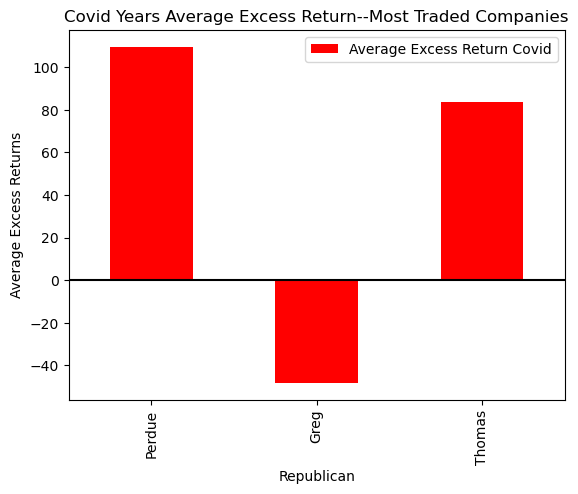

In [180]:
repub_covid_df.plot.bar(x='Republican', y="Average Excess Return Covid", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

**Average Excess Return for Prior Mentioned Companies from 2019-2021--Democrats**

In [181]:
josh__comp = josh_fil[josh_fil['Company'] == 'MICROSOFT CORPORATION']
mc_avg =josh__comp['excess_return'].mean()
mc_avg
print(f"The average excess return for Josh from Microsoft Corporation is {mc_avg} from 2019-2021.")

The average excess return for Josh from Microsoft Corporation is 84.83621794871796 from 2019-2021.


In [182]:
lois__comp = lois_fil[lois_fil['Company'] == 'DUPONT DE NEMOURS, INC.']
ddn_avg =lois__comp['excess_return'].mean()
ddn_avg
print(f"The average excess return for Lois from Dupont De Nemours, Inc. is {ddn_avg} from 2019-2021.")

The average excess return for Lois from Dupont De Nemours, Inc. is -27.148000000000003 from 2019-2021.


In [183]:
susie__comp = susie_fil[susie_fil['Company'] == 'BALL CORPORATION']
bc_avg =susie__comp['excess_return'].mean()
bc_avg
print(f"The average excess return for Susie from Ball Corporation is {bc_avg} from 2019-2021.")

The average excess return for Susie from Ball Corporation is -23.384761904761906 from 2019-2021.


In [184]:
democrat_covid = {"Democrat": ['Josh', 'Lois', 'Susie'],
               "Average Excess Return Covid": [mc_avg, ddn_avg, bc_avg]}

democrat_covid_df = pd.DataFrame(democrat_covid)
democrat_covid_df

,Democrat,Average Excess Return Covid
0,Josh,84.836218
1,Lois,-27.148000
2,Susie,-23.384762


Text(0.5, 1.0, 'Covid Years Average Excess Return--Most Traded Companies')

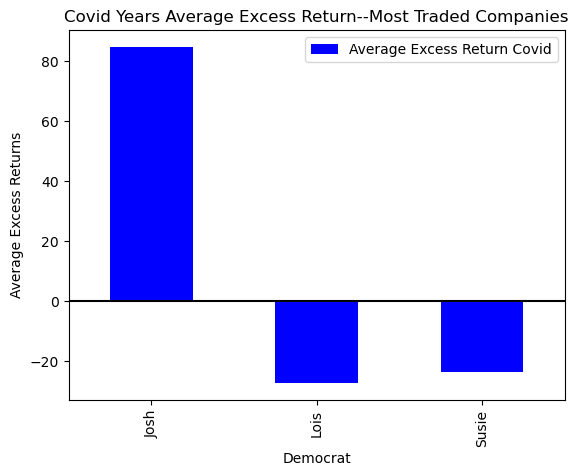

In [185]:
democrat_covid_df.plot.bar(x='Democrat', y="Average Excess Return Covid", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Covid Years Average Excess Return--Most Traded Companies')

#### Average Excess Returns in 2019-2021 (all companies accounted for)

In [186]:
perdue_exc_avg = perdue_fil['excess_return'].mean()
greg_exc_avg = greg_fil['excess_return'].mean()
thomas_exc_avg = thomas_fil['excess_return'].mean()

rep_exc_avg = {'Republican': ['Perdue', 'Greg', 'Thomas'],
               'Excess Return Average': [perdue_exc_avg, greg_exc_avg, thomas_exc_avg]}

rep_excavg_df = pd.DataFrame(rep_exc_avg)
rep_excavg_df

,Republican,Excess Return Average
0,Perdue,-6.543321
1,Greg,-16.947523
2,Thomas,83.470000


Text(0.5, 1.0, 'Republican Average Excess Returns--Covid Years')

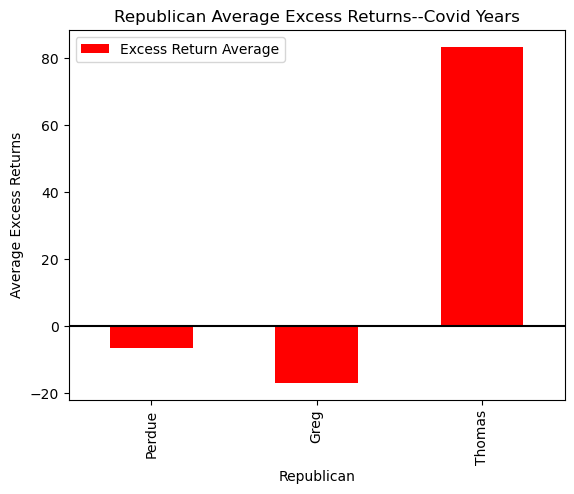

In [187]:
rep_excavg_df.plot.bar(x='Republican', y="Excess Return Average", color="r")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Republican Average Excess Returns--Covid Years')

In [188]:
josh_exc_avg = josh_fil['excess_return'].mean()
lois_exc_avg = lois_fil['excess_return'].mean()
susie_exc_avg = susie_fil['excess_return'].mean()

dem_exc_avg = {'Democrat': ['Josh', 'Lois', 'Susie'],
               'Excess Return Average': [josh_exc_avg, lois_exc_avg, susie_exc_avg]}

dem_excavg_df = pd.DataFrame(dem_exc_avg)
dem_excavg_df

,Democrat,Excess Return Average
0,Josh,5.269873
1,Lois,-19.122706
2,Susie,-16.986975


Text(0.5, 1.0, 'Deocrat Average Excess Returns--Covid Years')

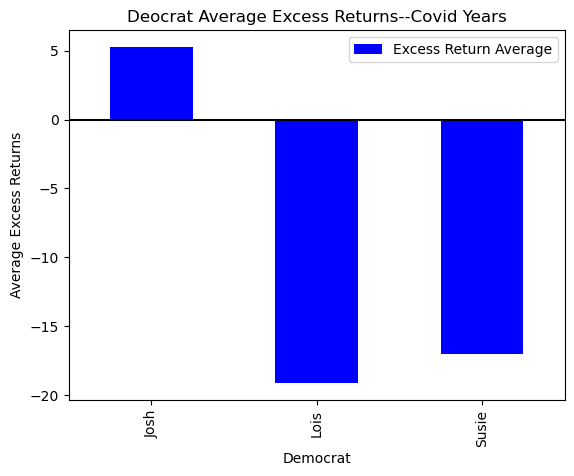

In [189]:
dem_excavg_df.plot.bar(x='Democrat', y="Excess Return Average", color="b")
plt.axhline(0, color='black', linestyle='-')
plt.ylabel('Average Excess Returns')
plt.title('Deocrat Average Excess Returns--Covid Years')

## Is there a difference in excess return based on the party of politician?

This section aims to identify the excess return of each party, the highest performing politician,
the excess return from 2019-2021, and the highest performing politician from 2019-2021.

The goal is to identify if there is in party performance, or a trend in the performance of an individual
that is worth making similar investments for someone outside of politics.

In [190]:
# Dataframe for the top 3 politicians for both parties
df_republicans = [df_thomas, df_perdue, df_greg]
combined_rep_df = pd.concat(df_republicans, axis=0)
db_democrats = [df_josh, df_lois, df_susie]
combined_dem_df = pd.concat(db_democrats, axis=0)
combined_parties_df = pd.concat([combined_rep_df, combined_dem_df], axis=0)
combined_parties_df

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.47,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.91,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.38,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.91,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.91,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
26713,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.84,Susie Lee (D)
26739,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.94,Susie Lee (D)
26742,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",0.00,Susie Lee (D)
26744,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",0.00,Susie Lee (D)


In [199]:
grouped_excess_return = combined_parties_df.groupby('Party')['excess_return'].sum()
print("Excess return for both parties for all years")
display(grouped_excess_return)

Excess return for both parties for all years


Party
D    -48738.67
R   -232027.01
Name: excess_return, dtype: float64

In [198]:
combined_19_21 = combined_parties_df[(combined_parties_df['Traded'].dt.year >= 2019) & (combined_parties_df['Traded'].dt.year <= 2021)]
print("Excess return for both parties from 2019-2021")
display(combined_19_21.groupby('Party')['excess_return'].sum())

Excess return for both parties from 2019-2021


Party
D   -22168.95
R   -18400.94
Name: excess_return, dtype: float64

In [203]:
grouped = combined_parties_df.groupby('Name_Party')['excess_return'].sum()
print("Excess return for all top politicians ")
display(grouped)

Excess return for all top politicians 


Name_Party
Greg Gianforte (R)      -31512.85
Josh Gottheimer (D)      17732.10
Lois Frankel (D)        -46089.56
Perdue, David (R)       -66352.28
Susie Lee (D)           -20381.21
Thomas Macarthur (R)   -134161.88
Name: excess_return, dtype: float64

In [204]:
# Highest sum of excess return of the top politician
person = grouped.idxmax()
highest_sum = round(grouped.max(), 2)

print(f"{person} had the highest excess return of {highest_sum} for all years")

Josh Gottheimer (D) had the highest excess return of 17732.1 for all years


In [205]:
filtered_df = combined_19_21[(combined_19_21['Traded'] >= '2019-01-01') & (combined_19_21['Traded'] <= '2021-12-31')]
grouped_19_21 = filtered_df.groupby('Name_Party')['excess_return'].sum()
person_19_21 = grouped_19_21.idxmax()
highest_sum_19_21 = round(grouped_19_21.max(), 2)

print(f"{person_19_21} had the highest excess return of {highest_sum_19_21} from 2019 - 2021")

Josh Gottheimer (D) had the highest excess return of 6213.18 from 2019 - 2021


**Question:** Which party had the highest excess return for all years?

**Answer:** Both parties had a negative excess return. The Republicans lost less money than the Democrats.
The excess return for the republicans was -23,2027.01, while the excess return for the Democrats was -48,738.67.
The Democrats lost 2.1 times more than the Repuclicans.

**Question:** What was the difference in excess return during from 2019-2021 based on the party?

**Answer:** When comparing the excess return by party from 2019-2021 the excess return was a lot closer.
Both parties were negative. The excess return for the Republicans was -18,400.94. The Democrats excess return was -22,168.95.

**Question:** Which politician performed the best across all years?

**Answer:** Josh Gottheimer (D) had the highest excess return of 17,732.1 for all years.

**Question:** Which politician performed the best from 2019-2021?

**Answer:** Josh Gottheimer (D) had the highest excess return of 6,213.18 from 2019-2021.

**Question:** Is it worth making investments based on the performance of a political party?

**Answer:** No, it is not worth making investments based on the excess return of a political party.
Both parties overall had a negative excess return.

**Question:** Is it worth making investments based on the performance of a a single politician?

**Answer:** Based on the performance of Josh Gottheimer (D), who had the highest excess return, it could be worth making similar investments
based on his investments.